#**Portofolio: SDSPhD2020**

*Participant: Majbritt K. Severin-Nielsen*

> 
*Assignment date: 11th of December, 2020*

---





# **Tuesday, 24th of November: Unsupervised & supervised machine learning**

---





---


##*Task 1. Unsupervised machine learning: Clustering*


---



I have created a larger set of variables from the Danish Value Study from 1999. You can find data here:

https://raw.githubusercontent.com/CALDISS-AAU/sdsphd20/master/datasets/value99.csv

In all examples, values towards 1 is agree a lot and values towards 5 is disagree a lot.

As an example: "Does not want alchoholics as neighbors" --> 1=does not want, 2=doesnt care

Or: Trust to the military --> 1=Trust very much, 2= Trust some, 3=Trust a little 4=Does not trust at all 

[![2hAEhX.md.png](https://iili.io/2hAEhX.md.png)](https://freeimage.host/i/2hAEhX)

Pick some varibles you think is interesting and play with creating clusters. Can we explain what is going on?

In [ ]:
# Import packages 
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn import metrics
from sklearn.metrics import davies_bouldin_score

In [ ]:
# Import the dataset into a dataframe (EVS 1999)
df=pd.read_csv("https://raw.githubusercontent.com/CALDISS-AAU/sdsphd20/master/datasets/value99.csv")
df=df.replace('.', np.NaN) # null entries are defined as NaNs

In [ ]:
# Get an initial overview of data
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1023 entries, 0 to 1022
Data columns (total 91 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v7      1023 non-null   int64 
 1   v9      1023 non-null   int64 
 2   v10     722 non-null    object
 3   v14     1023 non-null   int64 
 4   v56     1009 non-null   object
 5   v57     1022 non-null   object
 6   v58     1019 non-null   object
 7   v59     1008 non-null   object
 8   v60     1018 non-null   object
 9   v61     1013 non-null   object
 10  v104    1018 non-null   object
 11  v105    1019 non-null   object
 12  v106    1019 non-null   object
 13  v107    1019 non-null   object
 14  v108    1019 non-null   object
 15  v109    1019 non-null   object
 16  v110    1019 non-null   object
 17  v111    1019 non-null   object
 18  v112    1019 non-null   object
 19  v113    1019 non-null   object
 20  v114    1019 non-null   object
 21  v115    1019 non-null   object
 22  v116    1019 non-null   

In [ ]:
# Preprocessing the dataframe: Exclude NaNs
df = df.dropna(axis=0,how='any',subset=('v256', 'v257', 'v258', 'v259', 'v260', 'v261', 'v262', 'v263', 'v264', 'v265', 'v266', 'v267', 'v268', 'v269'))
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 1021
Data columns (total 91 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v7      768 non-null    int64 
 1   v9      768 non-null    int64 
 2   v10     571 non-null    object
 3   v14     768 non-null    int64 
 4   v56     762 non-null    object
 5   v57     768 non-null    object
 6   v58     767 non-null    object
 7   v59     761 non-null    object
 8   v60     766 non-null    object
 9   v61     762 non-null    object
 10  v104    765 non-null    object
 11  v105    766 non-null    object
 12  v106    766 non-null    object
 13  v107    766 non-null    object
 14  v108    766 non-null    object
 15  v109    766 non-null    object
 16  v110    766 non-null    object
 17  v111    766 non-null    object
 18  v112    766 non-null    object
 19  v113    766 non-null    object
 20  v114    766 non-null    object
 21  v115    766 non-null    object
 22  v116    766 non-null    o

In [ ]:
# Create id variable from 1-768 (to be used later in the assignment)
df['id']=range(1, 769)


In [ ]:
# Create variable: linked
X = df[['v256', 'v257', 'v258', 'v259', 'v260', 'v261', 'v262', 'v263', 'v264', 'v265', 'v266', 'v267', 'v268', 'v269']]
X_1 = df[['v256', 'v257', 'v258', 'v259', 'v260', 'v261', 'v262', 'v263', 'v264', 'v265', 'v266', 'v267', 'v268', 'v269']]
linked = linkage(X, 'ward')

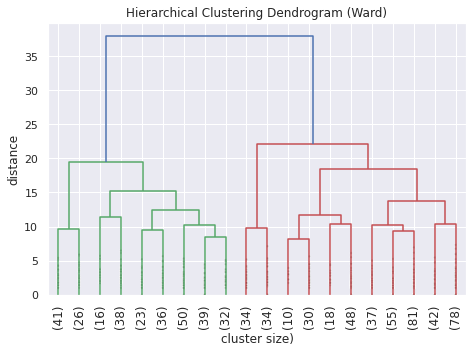

In [ ]:
# Create Dendogram

figure = plt.figure(figsize=(7.5, 5))
dendrogram(
    linked,
    truncate_mode='lastp',
    p=20,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
)
plt.title('Hierarchical Clustering Dendrogram (Ward)')
plt.xlabel('cluster size)')
plt.ylabel('distance')
plt.show()

Quick cheat sheet:

Davies Bouldin Score → as low as possible

Calinski-Harabasz → as high as possible

Silhouette-score → is a -1 to +1 thing. 0 is bad while values closer to the edges are better.

In [ ]:
# Print scores for different cluster constellations: Two clusters seem most viable based on CH score (large 'jump' from 2 to 3 clusters)

for k in range(2,11):
    cluster = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward').fit(X)
    labels=cluster.labels_
    dbs=davies_bouldin_score(X, labels)
    dbs=round(dbs,2)
    ch = metrics.calinski_harabasz_score(X, labels)
    ch=round(ch,2)
    ss=metrics.silhouette_score(X, labels, metric='euclidean')
    ss=round(ss,2)
    print("Cluster count-", k, "|", " db score-", dbs, "|", " ch score - ", ch, "|", " ss score - ", ss)
    k=str(k)
    df['cluster'+k]=labels


Cluster count- 2 |  db score- 2.31 |  ch score -  126.75 |  ss score -  0.14
Cluster count- 3 |  db score- 2.39 |  ch score -  89.86 |  ss score -  0.09
Cluster count- 4 |  db score- 2.68 |  ch score -  75.08 |  ss score -  0.08
Cluster count- 5 |  db score- 2.59 |  ch score -  67.36 |  ss score -  0.07
Cluster count- 6 |  db score- 2.66 |  ch score -  60.41 |  ss score -  0.07
Cluster count- 7 |  db score- 2.8 |  ch score -  55.03 |  ss score -  0.04
Cluster count- 8 |  db score- 2.81 |  ch score -  50.56 |  ss score -  0.04
Cluster count- 9 |  db score- 2.73 |  ch score -  47.0 |  ss score -  0.05
Cluster count- 10 |  db score- 2.64 |  ch score -  44.21 |  ss score -  0.05


In [ ]:
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward').fit(X)
labels=cluster.labels_
df['cluster']=labels

In [ ]:
# Check that they were constructed correctly
df.head()

v7  v9  v10  v14  v56  ... cluster7 cluster8 cluster9 cluster10 cluster
0   2   1    1    1    1  ...        0        4        4         1       0
1   1   1    2    0    1  ...        5        5        5         5       2
2   1   1    2    0    1  ...        5        5        5         5       2
3   2   1    1    1  NaN  ...        0        4        4         1       0
5   2   2  NaN    0    2  ...        6        6        6         6       1

[5 rows x 102 columns]

In [ ]:
# Convert from strings to integers to be able to calculate cluster characteristics
df['v256']=df['v256'].astype('int')
df['v257']=df['v257'].astype('int')
df['v258']=df['v258'].astype('int')
df['v259']=df['v259'].astype('int')
df['v260']=df['v260'].astype('int')
df['v261']=df['v261'].astype('int')
df['v262']=df['v262'].astype('int')
df['v263']=df['v263'].astype('int')
df['v264']=df['v264'].astype('int')
df['v265']=df['v265'].astype('int')
df['v266']=df['v266'].astype('int')
df['v267']=df['v267'].astype('int')
df['v268']=df['v268'].astype('int')
df['v269']=df['v269'].astype('int')




... and the results for 2 clusters are!
cluster2     0     1
v256      2.26  2.61
v257      2.10  2.77
v258      2.09  2.27
v259      2.62  2.93
v260      2.54  2.58
v261      1.69  2.02
v262      2.29  2.85
v263      2.28  2.71
v264      2.14  2.51
v265      2.64  3.37
v266      2.00  3.02
v267      1.99  2.83
v268      2.07  2.41
v269      1.93  2.24

And the size of the clusters if there are 2 clusters are
cluster2
0    467
1    301
Name: id, dtype: int64

And if we have 2 clusters, the dendrogram looks like


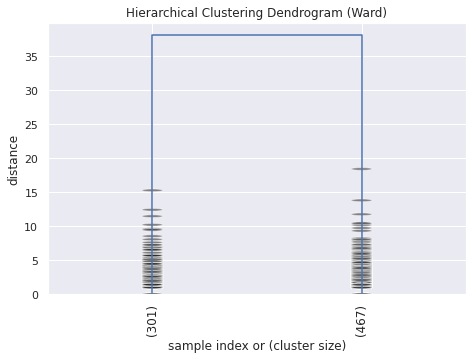



... and the results for 3 clusters are!
cluster3     0     1     2
v256      2.61  2.29  2.09
v257      2.77  2.13  1.90
v258      2.27  2.15  1.76
v259      2.93  2.70  2.10
v260      2.58  2.60  2.24
v261      2.02  1.79  1.09
v262      2.85  2.39  1.72
v263      2.71  2.36  1.79
v264      2.51  2.22  1.65
v265      3.37  2.71  2.22
v266      3.02  2.06  1.66
v267      2.83  2.05  1.68
v268      2.41  2.18  1.44
v269      2.24  2.06  1.16

And the size of the clusters if there are 3 clusters are
cluster3
0    301
1    399
2     68
Name: id, dtype: int64

And if we have 3 clusters, the dendrogram looks like


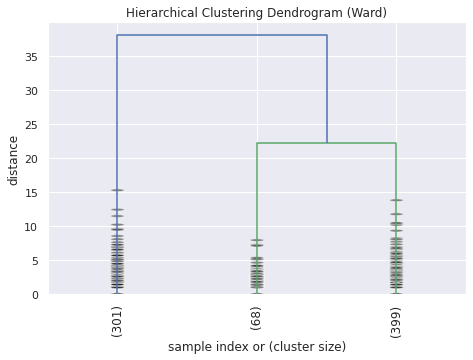



... and the results for 4 clusters are!
cluster4     0     1     2     3
v256      2.29  2.53  2.09  2.87
v257      2.13  2.68  1.90  3.09
v258      2.15  2.16  1.76  2.67
v259      2.70  2.85  2.10  3.21
v260      2.60  2.53  2.24  2.75
v261      1.79  1.91  1.09  2.42
v262      2.39  2.71  1.72  3.36
v263      2.36  2.62  1.79  3.06
v264      2.22  2.39  1.65  2.93
v265      2.71  3.27  2.22  3.72
v266      2.06  2.86  1.66  3.60
v267      2.05  2.67  1.68  3.37
v268      2.18  2.32  1.44  2.70
v269      2.06  2.10  1.16  2.73

And the size of the clusters if there are 4 clusters are
cluster4
0    399
1    234
2     68
3     67
Name: id, dtype: int64

And if we have 4 clusters, the dendrogram looks like


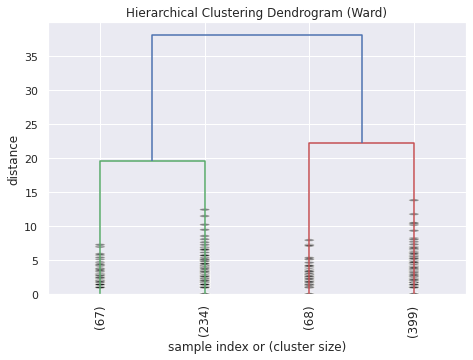



... and the results for 5 clusters are!
cluster5     0     1     2     3     4
v256      2.53  2.33  2.09  2.87  2.18
v257      2.68  2.16  1.90  3.09  2.06
v258      2.16  2.03  1.76  2.67  2.48
v259      2.85  2.61  2.10  3.21  2.97
v260      2.53  2.50  2.24  2.75  2.86
v261      1.91  1.82  1.09  2.42  1.72
v262      2.71  2.23  1.72  3.36  2.84
v263      2.62  2.16  1.79  3.06  2.92
v264      2.39  2.09  1.65  2.93  2.58
v265      3.27  2.60  2.22  3.72  3.02
v266      2.86  2.14  1.66  3.60  1.82
v267      2.67  2.13  1.68  3.37  1.81
v268      2.32  2.10  1.44  2.70  2.41
v269      2.10  2.06  1.16  2.73  2.04

And the size of the clusters if there are 5 clusters are
cluster5
0    234
1    293
2     68
3     67
4    106
Name: id, dtype: int64

And if we have 5 clusters, the dendrogram looks like


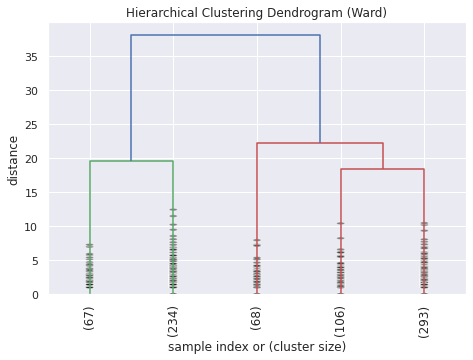

In [ ]:
# Calculate characteristics of different cluster constellations
for i in range(2,6):
    i=str(i)
    X_1=df[['cluster'+i,'v256', 'v257', 'v258', 'v259', 'v260', 'v261', 'v262', 'v263', 'v264', 'v265', 'v266', 'v267', 'v268', 'v269']]
    stuff=X_1.groupby(['cluster'+i]).mean()
    trans_stuff=stuff.T
    ts=round(trans_stuff,2)
    print("")
    print("")
    print('... and the results for' ,i, 'clusters are!')	
    print(ts)
    print("")
    count=df.groupby(['cluster'+i])['id'].count()
    print("And the size of the clusters if there are",i, "clusters are")
    print(count)
    print("")
    print("And if we have",i,"clusters, the dendrogram looks like")
    i=int(i)
    figure = plt.figure(figsize=(7.5, 5))
    dendrogram(
            linked,
        truncate_mode='lastp',  # show only the last p merged clusters
        p=i,  # show only the last p merged clusters
        leaf_rotation=90.,
        leaf_font_size=12.,
        show_contracted=True,  # to get a distribution impression in truncated branches
    )
    plt.title('Hierarchical Clustering Dendrogram (Ward)')
    plt.xlabel('sample index or (cluster size)')
    plt.ylabel('distance')
    plt.show()



---


##*Task 2. Supervised Machine Learning: Employee turnover*


---



### Employee turnover

#### The assignment

In the repo, you will find a dataset describing employee turnover in a company.

https://raw.githubusercontent.com/CALDISS-AAU/sdsphd20/master/datasets/turnover.csv

The dataset contains data collected in an employee survey and enriched with HR data.

The variable `churn` tells us if the employee left the company in the past 3 months. The other variables are collected

#### Classification

Try to predict `churn` using a classification pipeline (perhaps add some simple exploration of the data first)

#### Regression
Try to predict the number of weekly average hours worked.

**Before** working with the data, you should use `pd.get_dummies` to get dummies for categorical variables.

**Classification**

In [ ]:
# Import packages
import pandas as pd
import seaborn as sns
import altair as alt


sns.set(rc={'figure.figsize':(10,10)})

In [ ]:
# Import dataset
data = pd.read_csv('https://raw.githubusercontent.com/CALDISS-AAU/sdsphd20/master/datasets/turnover.csv')

In [ ]:
# Initial exploration of data
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   satisfaction          14999 non-null  float64
 1   evaluation            14999 non-null  float64
 2   number_of_projects    14999 non-null  int64  
 3   average_montly_hours  14999 non-null  int64  
 4   time_spend_company    14999 non-null  int64  
 5   work_accident         14999 non-null  int64  
 6   churn                 14999 non-null  int64  
 7   promotion             14999 non-null  int64  
 8   department            14999 non-null  object 
 9   salary                14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


satisfaction  evaluation  number_of_projects  ...  promotion  department  salary
0          0.38        0.53                   2  ...          0       sales     low
1          0.80        0.86                   5  ...          0       sales  medium
2          0.11        0.88                   7  ...          0       sales  medium
3          0.72        0.87                   5  ...          0       sales     low
4          0.37        0.52                   2  ...          0       sales     low

[5 rows x 10 columns]

In [ ]:
# Convert categorical variables to dummies: Department
data2 = pd.get_dummies(data['department'])
data2.head()



IT  RandD  accounting  hr  ...  product_mng  sales  support  technical
0   0      0           0   0  ...            0      1        0          0
1   0      0           0   0  ...            0      1        0          0
2   0      0           0   0  ...            0      1        0          0
3   0      0           0   0  ...            0      1        0          0
4   0      0           0   0  ...            0      1        0          0

[5 rows x 10 columns]

In [ ]:
# Convert categorical variables to dummies: salary
data3 = pd.get_dummies(data['salary'])
data3.head()

high  low  medium
0     0    1       0
1     0    0       1
2     0    0       1
3     0    1       0
4     0    1       0

In [ ]:
# Merge dataframes

data=pd.concat([data,data2,data3], axis=1)
data.head()


satisfaction  evaluation  number_of_projects  ...  high  low  medium
0          0.38        0.53                   2  ...     0    1       0
1          0.80        0.86                   5  ...     0    0       1
2          0.11        0.88                   7  ...     0    0       1
3          0.72        0.87                   5  ...     0    1       0
4          0.37        0.52                   2  ...     0    1       0

[5 rows x 23 columns]

In [ ]:
# Delete original categorical variables
del data['department']
del data['salary']

In [ ]:
data.head()

satisfaction  evaluation  number_of_projects  ...  high  low  medium
0          0.38        0.53                   2  ...     0    1       0
1          0.80        0.86                   5  ...     0    0       1
2          0.11        0.88                   7  ...     0    0       1
3          0.72        0.87                   5  ...     0    1       0
4          0.37        0.52                   2  ...     0    1       0

[5 rows x 21 columns]

In [ ]:
# Select the (independent) features that we are going to use to train the model
X = data.loc[:,'satisfaction':'medium']

X.describe() # Get overview of X

satisfaction    evaluation  ...           low        medium
count  14999.000000  14999.000000  ...  14999.000000  14999.000000
mean       0.612834      0.716102  ...      0.487766      0.429762
std        0.248631      0.171169  ...      0.499867      0.495059
min        0.090000      0.360000  ...      0.000000      0.000000
25%        0.440000      0.560000  ...      0.000000      0.000000
50%        0.640000      0.720000  ...      0.000000      0.000000
75%        0.820000      0.870000  ...      1.000000      1.000000
max        1.000000      1.000000  ...      1.000000      1.000000

[8 rows x 21 columns]

In [ ]:
# Delete Churn from independent features
del X['churn']

In [ ]:
X.describe() # Get overview of X once again

satisfaction    evaluation  ...           low        medium
count  14999.000000  14999.000000  ...  14999.000000  14999.000000
mean       0.612834      0.716102  ...      0.487766      0.429762
std        0.248631      0.171169  ...      0.499867      0.495059
min        0.090000      0.360000  ...      0.000000      0.000000
25%        0.440000      0.560000  ...      0.000000      0.000000
50%        0.640000      0.720000  ...      0.000000      0.000000
75%        0.820000      0.870000  ...      1.000000      1.000000
max        1.000000      1.000000  ...      1.000000      1.000000

[8 rows x 20 columns]

In [ ]:
# Define the dependent variabel / target to predict (churn)
y = data.churn

### Transforming, preprocessing and splitting

In [ ]:
# DELETE EVT

# Load and instantiate a LabelEncoder that will turn our text labels (regions into indices)
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
# DELETE EVT --> Ikke relevant da vores y allerede er nummerisk

# Transform labels into indices by passing y to the encoder
y_enc = encoder.fit_transform(y)

In [ ]:
# Load and instantiate a StandardScaler 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
# Apply the scaler to our X-features
X_scaled = scaler.fit_transform(X)

In [ ]:
# Split the data using the train_test_split module. We keep 20% of the data for testing and use 80% to train the model
# Random state defined with an arbitrary number for reproducibility

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 42)

### Training and evaluating various models

In [ ]:
# Import modules that we are going to use for all models

# Import K-fold crossvalidation
from sklearn.model_selection import cross_val_score

# Import Classification Report for later evaluatoion of performance
from sklearn.metrics import classification_report

### LogisticRegression (let's call it that for now without going into details)

In [ ]:
# Import and instantiate the model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=2000)

# K-fold cross-validation (splitting the 80% into 5 chunks, using 4 to train and 1 to evaluate)
scores = cross_val_score(model, X_train, y_train, cv = 5)
print(scores)


[0.78583333 0.7925     0.78833333 0.79916667 0.78032514]


In [ ]:
# Model training
model.fit(X_train, y_train)

# Model performance on the test-set
print(model.score(X_test, y_test))

0.7843333333333333


### Random Forest
Now we can try out a more complex model (and hopefully more powerfull)
The process is exactly the same and thus there are not too many comments in the code

In [ ]:
# Import random forest

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

scores = cross_val_score(model, X_train, y_train, cv = 5)
print(scores)



[0.98916667 0.98833333 0.98666667 0.99       0.99041267]


In [ ]:
# Model training and performance
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

0.9876666666666667


**Regression: Predict weekly hours worked**

In [ ]:
# Convert average monthly hours to average weekly hours
average_weekly_hours = data['average_montly_hours'] / 4

In [ ]:
# Inspect new variable 
average_weekly_hours.describe()

count    14999.000000
mean        50.262584
std         12.485775
min         24.000000
25%         39.000000
50%         50.000000
75%         61.250000
max         77.500000
Name: average_montly_hours, dtype: float64

In [ ]:
# Add new column to dataframe
data['average_weekly_hours'] = average_weekly_hours

In [ ]:
# Check that the column was added correctly
data

satisfaction  evaluation  ...  medium  average_weekly_hours
0              0.38        0.53  ...       0                 39.25
1              0.80        0.86  ...       1                 65.50
2              0.11        0.88  ...       1                 68.00
3              0.72        0.87  ...       0                 55.75
4              0.37        0.52  ...       0                 39.75
...             ...         ...  ...     ...                   ...
14994          0.40        0.57  ...       0                 37.75
14995          0.37        0.48  ...       0                 40.00
14996          0.37        0.53  ...       0                 35.75
14997          0.11        0.96  ...       0                 70.00
14998          0.37        0.52  ...       0                 39.50

[14999 rows x 22 columns]

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


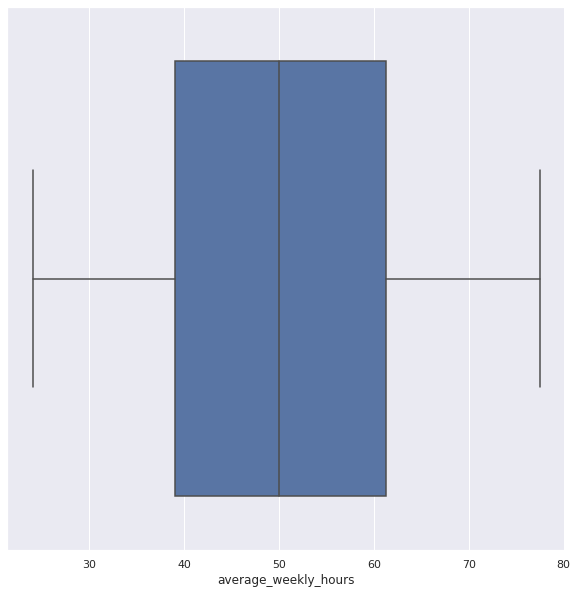

In [ ]:
# Select outcome variable for regression 
y_reg = data.average_weekly_hours 

# Overview of distribution of outcome variable
sns.boxplot(data.average_weekly_hours)

In [ ]:
# Create new train / test splits

X_train, X_test, y_train, y_test, data_train, data_test = train_test_split(X_scaled, y_reg, data, test_size = 0.2, random_state = 42)

In [ ]:
# Import and instantiate the baseline model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Model training
model.fit(X_train, y_train)

# Model performance on the test-set / This score is not accuracy but a R^2
print(model.score(X_test, y_test))

1.0


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


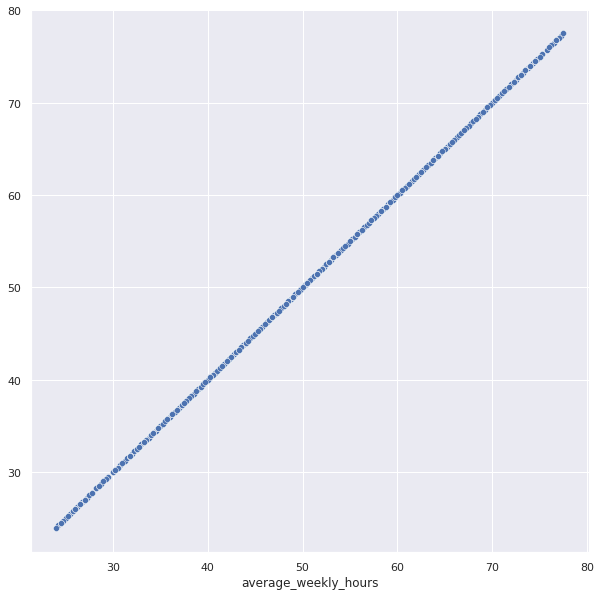

In [ ]:
# We can also inspect our results visually
y_pred = model.predict(X_test)

# Display scatterploat: y_test and y_pred
sns.scatterplot(y_test,y_pred)

Let's try a different model class

In [ ]:
# Import and instantiate a XGBoost Regressor
import xgboost as xgb
model = xgb.XGBRegressor()

# Model training
model.fit(X_train, y_train)

# Model performance on the test-set / This score is not accuracy but a R^2
print(model.score(X_test, y_test))

[12:10:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.9999635551912243


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


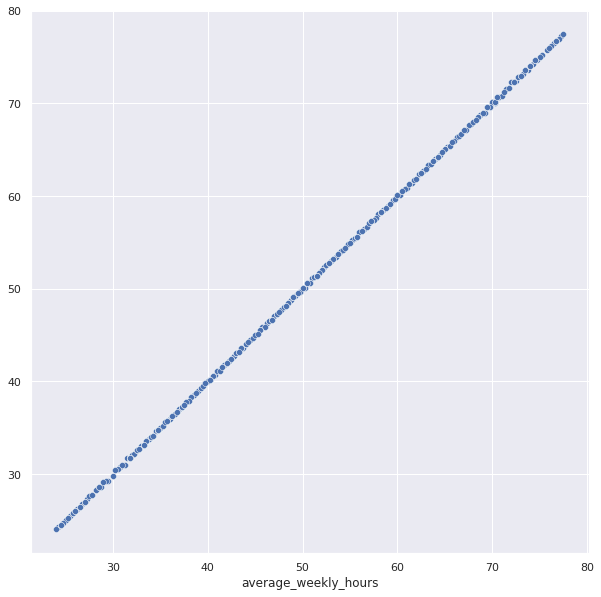

In [ ]:
# Inspect results visually
y_pred = model.predict(X_test)

sns.scatterplot(y_test,y_pred)



---

# **Wednesday, 25th of November 2020: Network Analysis & Spatial Analysis**


---





---


##*Task 1: Exercise for network analysis (Case Study 1)*


---



### Introduction to the case

* Emmanuel Lazega, The Collegial Phenomenon: The Social Mechanisms of Cooperation Among Peers in a Corporate Law Partnership, Oxford University Press (2001).

#### Data 
This data set comes from a network study of corporate law partnership that was carried out in a Northeastern US corporate law firm, referred to as SG&R, 1988-1991 in New England. It includes (among others) measurements of networks among the 71 attorneys (partners and associates) of this firm, i.e. their strong-coworker network, advice network, friendship network, and indirect control networks. Various members' attributes are also part of the dataset, including seniority, formal status, office in which they work, gender, lawschool attended, individual performance measurements (hours worked, fees brought in), attitudes concerning various management policy options, etc. This dataset was used to identify social processes such as bounded solidarity, lateral control, quality control, knowledge sharing, balancing powers, regulation, etc. among peers.

#### Setting
* What do corporate lawyers do? Litigation and corporate work.
* Division of work and interdependencies.
* Three offices, no departments, built-in pressures to grow, intake and assignment rules.
* Partners and associates: hierarchy, up or out rule, billing targets.
* Partnership agreement (sharing benefits equally, 90% exclusion rule, governance structure, elusive committee system) and incompleteness of the contracts.
* Informal, unwritten rules (ex: no moonlighting, no investment in buildings, no nepotism, no borrowing to pay partners, etc.).
* Huge incentives to behave opportunistically ; thus the dataset is appropriate for the study of social processes that make cooperation among rival partners possible. 
* Sociometric name generators used to elicit coworkers, advice, and 'friendship' ties at SG&R:"Here is the list of all the members of your Firm."

The networks where created according to the follwoing questionaire:

* Strong coworkers network: "Because most firms like yours are also organized very informally, it is difficult to get a clear idea of how the members really work together. Think back over the past year, consider all the lawyers in your Firm. Would you go through this list and check the names of those with whom you have worked with. By "worked with" I mean that you have spent time together on at least one case, that you have been assigned to the same case, that they read or used your work product or that you have read or used their work product; this includes professional work done within the Firm like Bar association work, administration, etc."
* Basic advice network: "Think back over the past year, consider all the lawyers in your Firm. To whom did you go for basic professional advice? For instance, you want to make sure that you are handling a case right, making a proper decision, and you want to consult someone whose professional opinions are in general of great value to you. By advice I do not mean simply technical advice."
* 'Friendship' network:
"Would you go through this list, and check the names of those you socialize with outside work. You know their family, they know yours, for instance. I do not mean all the people you are simply on a friendly level with, or people you happen to meet at Firm functions." 

### Data preperation

#### Packages

In [ ]:
# Installing visualization packages
!pip install -U bokeh
!pip install -q holoviews

Requirement already up-to-date: bokeh in /usr/local/lib/python3.6/dist-packages (2.2.3)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import itertools # Python's amazing iteration & combination library
import networkx as nx

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
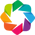

In [ ]:
# Visualization defaults
import holoviews as hv
from holoviews import opts
hv.extension('bokeh')
from bokeh.plotting import show

# Setting the default figure size a bit larger
defaults = dict(width=750, height=750, padding=0.1,
                xaxis=None, yaxis=None)
hv.opts.defaults(
    opts.EdgePaths(**defaults), opts.Graph(**defaults), opts.Nodes(**defaults))

####  Load the data

Lets load the data! The three networks refer to cowork, friendship, and advice. The first 36 respondents are the partners in the firm.

(the cell belows reads in the tables, performs some recoding and cleanup and then combines them to a single network to work with).

In [ ]:
mat_friendship = pd.read_table("https://www.dropbox.com/s/0saiulir3pr566k/ELfriend.dat?dl=1", delim_whitespace=True, header=None) 
mat_advice = pd.read_table("https://www.dropbox.com/s/apq42n1grim23k9/ELadv.dat?dl=1", delim_whitespace=True, header=None) 
mat_work = pd.read_table("https://www.dropbox.com/s/dliz0sd7or8tv01/ELwork.dat?dl=1", delim_whitespace=True, header=None)

G_friendship = nx.from_pandas_adjacency(mat_friendship, create_using=nx.DiGraph)
G_advice = nx.from_pandas_adjacency(mat_advice, create_using=nx.DiGraph)
G_work = nx.from_pandas_adjacency(mat_work, create_using=nx.DiGraph)

attributes = pd.read_table("https://www.dropbox.com/s/qz7fvfgx8lvjgpr/ELattr.dat?dl=1", delim_whitespace=True, header=None, dtype='int') 
attributes=attributes.round().astype(int)
attributes.columns = ["id", "seniority", "gender", "office", "tenure", "age", "practice", "school"]
attributes.set_index('id',inplace=True)

cleanup_nums = {"seniority":     {1: "Partner", 2: "Associate"},
                "gender":     {1: "Male", 2: "Female"},
                "office":     {1: "Boston", 2: "Hartford", 3:"Providence"},
                "practice":     {1: "Litigation", 2: "Corporate"},
                "school":     {1: "Harvard, Yale", 2: "Ucon", 3: "Others"}
                } 
attributes.replace(cleanup_nums, inplace=True)

attributes_dict=attributes.T.to_dict()

nx.set_node_attributes(G_friendship, attributes_dict)
nx.set_node_attributes(G_advice, attributes_dict)
nx.set_node_attributes(G_work, attributes_dict)

print(nx.get_node_attributes(G_friendship, 'seniority'))

{1: 'Partner', 2: 'Partner', 3: 'Partner', 4: 'Partner', 5: 'Partner', 6: 'Partner', 7: 'Partner', 8: 'Partner', 9: 'Partner', 10: 'Partner', 11: 'Partner', 12: 'Partner', 13: 'Partner', 14: 'Partner', 15: 'Partner', 16: 'Partner', 17: 'Partner', 18: 'Partner', 19: 'Partner', 20: 'Partner', 21: 'Partner', 22: 'Partner', 23: 'Partner', 24: 'Partner', 25: 'Partner', 26: 'Partner', 27: 'Partner', 28: 'Partner', 29: 'Partner', 30: 'Partner', 31: 'Partner', 32: 'Partner', 33: 'Partner', 34: 'Partner', 35: 'Partner', 36: 'Partner', 37: 'Associate', 38: 'Associate', 39: 'Associate', 40: 'Associate', 41: 'Associate', 42: 'Associate', 43: 'Associate', 44: 'Associate', 45: 'Associate', 46: 'Associate', 47: 'Associate', 48: 'Associate', 49: 'Associate', 50: 'Associate', 51: 'Associate', 52: 'Associate', 53: 'Associate', 54: 'Associate', 55: 'Associate', 56: 'Associate', 57: 'Associate', 58: 'Associate', 59: 'Associate', 60: 'Associate', 61: 'Associate', 62: 'Associate', 63: 'Associate', 64: 'Asso

#### Calculate dimensional centralities

There might be better ways to do that (still experimenting), but for now lets first create centralities upfront for all networks. We for now only look at the in-degree.

In [ ]:
cent_degree_friendship = dict(G_friendship.in_degree)
cent_degree_advice = dict(G_advice.in_degree)
cent_degree_work = dict(G_work.in_degree)

In [ ]:
nx.set_node_attributes(G_friendship, cent_degree_friendship, 'cent_degree')
nx.set_node_attributes(G_advice, cent_degree_advice, 'cent_degree')
nx.set_node_attributes(G_work, cent_degree_work, 'cent_degree')

In [ ]:
# Create and save a layout
G_layout = nx.layout.kamada_kawai_layout(G_work)

In [ ]:
g_plot = hv.Graph.from_networkx(G_friendship, G_layout).opts(tools=['hover'],
                                                                        directed=True,
                                                                        edge_alpha=0.25,
                                                                        node_size='cent_degree',
                                                                        #node_color='seniority', cmap='Set1',
                                                                        legend_position='right'
                                                                        )

show(hv.render(g_plot))

In [ ]:
g_plot = hv.Graph.from_networkx(G_advice, G_layout).opts(tools=['hover'],
                                                                        directed=True,
                                                                        edge_alpha=0.25,
                                                                        node_size='cent_degree',
                                                                        #node_color='cent_degree', cmap='Set1',
                                                                        legend_position='right')
show(hv.render(g_plot))

In [ ]:
g_plot = hv.Graph.from_networkx(G_work, G_layout).opts(tools=['hover'],
                                                                        directed=True,
                                                                        edge_alpha=0.25,
                                                                        node_size='cent_degree',
                                                                        #node_color='seniority', cmap='Set1',
                                                                        legend_position='right')
show(hv.render(g_plot))

#### Assortiativity

We can also calculate another interested measure, particularly in social networks: Assortiativity. In a nutshell, it measures if two nodes that share certain characteristics ahve a higher or lower probability to be connected.

For details, check:

* Newman, M. E. J. (27 February 2003). "Mixing patterns in networks". Physical Review E. American Physical Society (APS). 67 (2): 026126

In [ ]:
nx.attribute_assortativity_coefficient(G_friendship, 'seniority')

0.5354650209260934

In [ ]:
nx.attribute_assortativity_coefficient(G_friendship, 'school')

0.019171775624653234

In [ ]:
nx.attribute_assortativity_coefficient(G_friendship, 'office')

0.03651083062621187

#### Reciprocity

Anotyher interesting question usually is, if directed edges are reciptocated, meaning that an edge between `i,j` makes an edge between `j,i` more likely

In [ ]:
nx.overall_reciprocity(G_friendship)

0.6121739130434782

### The assignment

Explore the network further.

1. Calculate the reciprocity for the work and advise network. Are the numbers diffetrent? Why might that be the case?
2. Identify communities in the friendship and advice network (hint: works only on undirected networks, so you might have to create an undirected graph)
3. Visualize these communities (static or dynamic)

In [ ]:
# Calculate reciprocity for work network
nx.overall_reciprocity(G_work)

1.0

In [ ]:
# Calculate reciprocity for advice network
nx.overall_reciprocity(G_advice)

0.3923766816143498

In [ ]:
# Import `python-louvain` to identify communities
import community 

In [ ]:
# Create new variables: Graph instead of DiGraph
G_friendship2 = nx.from_pandas_adjacency(mat_friendship, create_using=nx.Graph)
G_advice2 = nx.from_pandas_adjacency(mat_advice, create_using=nx.Graph)

In [ ]:
# Find the optimal partition with the Louvain algorithm for friendship network
friend_com = community.best_partition(G_friendship2)

In [ ]:
# The number of communities detected in friendship network
max(friend_com.values())

5

In [ ]:
# Calculation of degree centrality: G_friendship2
cent_degree_friendship = dict(G_friendship2.degree)
nx.set_node_attributes(G_friendship2, cent_degree_friendship, 'cent_degree')

In [ ]:
# Create and save a layout
G_layout_friend = nx.layout.kamada_kawai_layout(G_friendship2)

In [ ]:
# Visualize the friendship communities 
nx.set_node_attributes(G_friendship2, friend_com, 'friend_com') 

g_plot = hv.Graph.from_networkx(G_friendship2, G_layout_friend).opts(tools=['hover'],
                                                  node_size='cent_degree', 
                                                  node_color='friend_com', cmap=plt.cm.Set1,
                                                  legend_position='right')

show(hv.render(g_plot))

In [ ]:
# Find the optimal partition with the Louvain algorithm for advice network
advice_com = community.best_partition(G_advice2)

In [ ]:
# The number of communities detected in advice network
max(advice_com.values())

2

In [ ]:
# Calculation of degree centrality: G_friendship2
cent_degree_advice = dict(G_advice2.degree)
nx.set_node_attributes(G_advice2, cent_degree_friendship, 'cent_degree')

In [ ]:
# Create and save a layout
G_layout_advice = nx.layout.kamada_kawai_layout(G_advice2)

In [ ]:
# Visualize the advice communities 
nx.set_node_attributes(G_advice2, advice_com, 'advice_com')

g_plot = hv.Graph.from_networkx(G_advice2, G_layout_advice).opts(tools=['hover'],
                                                  node_size='cent_degree', 
                                                  node_color='advice_com', cmap=plt.cm.Set1,
                                                  legend_position='right')

show(hv.render(g_plot))



---


##*Task 2: Exercise for Spatial Analysis*


---



So, now I have a better hypothesis; mental health has something to do with noise!

Here, you find a new geo-dataset;

- OPEN_DATA_STOEJDATA_VIEWPoint.shp

This contains information about noise at different places within municipalities. The end goal is to create a map where each point is aggregated to municipality level and we visualize where the noise is more severe. We use the column "GNSHAST071" to measure average noice at that point.

When that map is done, create a pretty map with the mental health measurement and compare the two - are there any connection between noise at an aggregated level and mental health?

Feel free to play around with types of basemaps, types of colors and all sorts of things - the goal is not to become the leading expert in making fancy maps but to have fun and learn stuff.

In [ ]:
!pip install geopandas # geopandas is not installed by default on Colab - this installs it
!pip install contextily # contextily is not installed by default on Colab - this installs it
!pip install pygeos # pygeos optional dependency for geopandas (which we will use)

     |████████████████████████████████| 972kB 5.7MB/s 
     |████████████████████████████████| 6.5MB 14.6MB/s 
     |████████████████████████████████| 14.8MB 314kB/s 
     |████████████████████████████████| 18.3MB 1.4MB/s 
     |████████████████████████████████| 1.6MB 4.2MB/s 


In [ ]:
# Download and unzip shape files for exercise

!wget "https://github.com/CALDISS-AAU/sdsphd20/raw/master/notebooks/wed25/Shapefiles/shapefiles_exercise.zip"
!unzip shapefiles_exercise.zip

--2020-12-04 08:19:50--  https://github.com/CALDISS-AAU/sdsphd20/raw/master/notebooks/wed25/Shapefiles/shapefiles_exercise.zip
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/CALDISS-AAU/sdsphd20/master/notebooks/wed25/Shapefiles/shapefiles_exercise.zip [following]
--2020-12-04 08:19:51--  https://raw.githubusercontent.com/CALDISS-AAU/sdsphd20/master/notebooks/wed25/Shapefiles/shapefiles_exercise.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 951658 (929K) [application/zip]
Saving to: ‘shapefiles_exercise.zip’

shapefiles_exercise 100%[===================>] 929.35K  --.-KB/s    in 0.06s   

2020

In [ ]:
# Loading required packages

import geopandas as gdp
import pandas as pd
import matplotlib.pyplot as plt
from pyproj import Proj
import contextily as ctx

/usr/local/lib/python3.6/dist-packages/geopandas/_compat.py:88: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.8.1-CAPI-1.13.3). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [ ]:
# Load the data

stoejdata = gdp.read_file("OPEN_DATA_STOEJDATA_VIEWPoint.shp")

In [ ]:
# Inspect dataframe
stoejdata.head()

DATAEJER  VEJBESTYRE  ...  GNSHAST222                        geometry
0      316       316.0  ...        50.7  POINT (666785.000 6174847.000)
1      316       316.0  ...        61.0  POINT (650362.000 6165481.000)
2      316       316.0  ...        39.6  POINT (670888.000 6165624.000)
3      316       316.0  ...        74.1  POINT (675622.000 6167385.000)
4      316       316.0  ...        58.7  POINT (668085.000 6163679.000)

[5 rows x 36 columns]

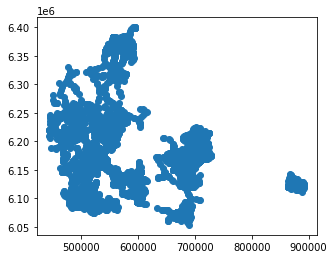

In [ ]:
# Make sure that the plot function works with the data
stoejdata.plot()

In [ ]:
# Download and unzip the municipality dataset from the lecture with Rolf (to get information about municipalities)

!wget "https://github.com/CALDISS-AAU/sdsphd20/raw/master/notebooks/wed25/Shapefiles/shapefiles.zip" # Downloads data files
!unzip shapefiles.zip # Unpacks data files

--2020-12-04 08:20:06--  https://github.com/CALDISS-AAU/sdsphd20/raw/master/notebooks/wed25/Shapefiles/shapefiles.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/CALDISS-AAU/sdsphd20/master/notebooks/wed25/Shapefiles/shapefiles.zip [following]
--2020-12-04 08:20:06--  https://raw.githubusercontent.com/CALDISS-AAU/sdsphd20/master/notebooks/wed25/Shapefiles/shapefiles.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 32728265 (31M) [application/zip]
Saving to: ‘shapefiles.zip’

shapefiles.zip      100%[===================>]  31.21M  57.5MB/s    in 0.5s    

2020-12-04 08:20:08 (57.5 MB/s) - ‘shap

In [ ]:
# Load the data from the lecture and inspect it

municipalities = gdp.read_file("KOMMUNE.shp")
municipalities.head()

FEAT_ID  ...                                           geometry
0   149673  ...  POLYGON Z ((675926.480 6172129.210 -999.000, 6...
1   149674  ...  POLYGON Z ((687523.890 6176458.950 -999.000, 6...
2   149675  ...  POLYGON Z ((689361.510 6173523.720 -999.000, 6...
3   149676  ...  POLYGON Z ((689210.210 6174589.210 -999.000, 6...
4   149647  ...  POLYGON Z ((679613.660 6187623.990 -999.000, 6...

[5 rows x 25 columns]

In [ ]:
# Use dissolve so that municipalities appear no more than once in the dataset 'mun'

mun = municipalities.dissolve(by='KOMNAVN')

In [ ]:
# Check that the dissolve was succesful
mun.info(verbose=False)

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 99 entries, Aabenraa to Ærø
Columns: 24 entries, geometry to TIMEOF_EXP
dtypes: float64(1), geometry(1), int64(3), object(19)
memory usage: 21.8+ KB


In [ ]:
# Inspect which coordinate system was used in stoejdata
stoejdata.crs

<Projected CRS: EPSG:25832>
Name: ETRS89 / UTM zone 32N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Europe between 6°E and 12°E: Austria; Belgium; Denmark - onshore and offshore; Germany - onshore and offshore; Norway including - onshore and offshore; Spain - offshore.
- bounds: (6.0, 38.76, 12.0, 83.92)
Coordinate Operation:
- name: UTM zone 32N
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [ ]:
# Inspect which coordinate system was used in mun data
mun.crs

<Projected CRS: PROJCS["UTM32_EUREF89",GEOGCS["GCS_EUREF89",DATUM[ ...>
Name: UTM32_EUREF89
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: UTM zone 32N
- method: Transverse Mercator
Datum: EUREF89
- Ellipsoid: Geodetic_Reference_System_of_1980
- Prime Meridian: Greenwich

In [ ]:
# Convert coordinate systems in mun and stoejdata
stoejdata2=stoejdata.to_crs(epsg=3857)
mun2=mun.to_crs(epsg=3857)

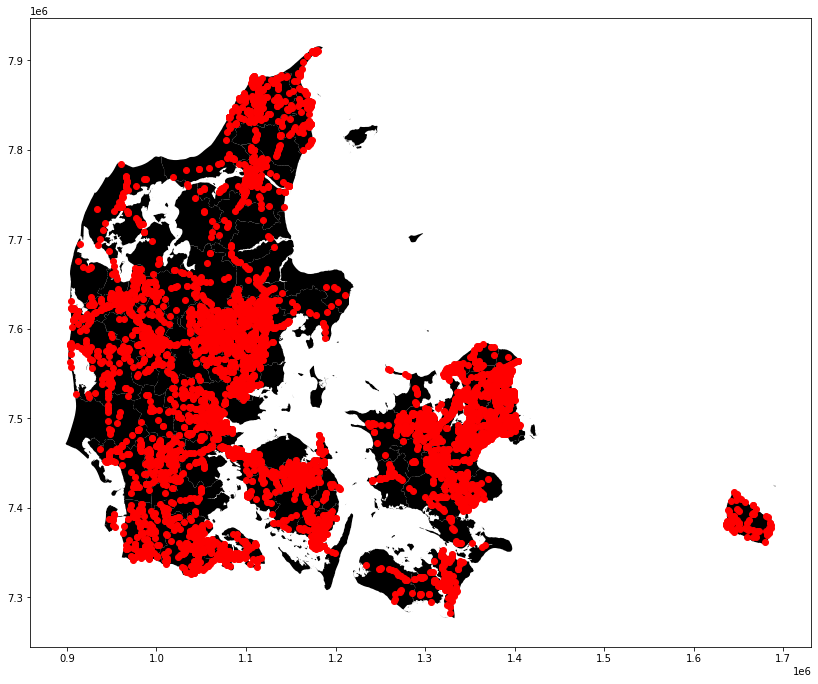

In [ ]:
# Inspect whether the operation was succesful
fig, ax =plt.subplots(1,1, figsize=(14,14))
mun2.plot(ax=ax, color="black")
stoejdata2.plot(ax=ax, color="red")

In [ ]:
# Conduct a spatial join of stoejdata2 and mun2 

stoej_in_mun = gdp.sjoin(stoejdata2, mun2, how="right", op='within')

In [ ]:
# Examine the joined dataset
stoej_in_mun.head()

index_left DATAEJER  VEJBESTYRE  ...  TIMEOF_PUB TIMEOF_REV  TIMEOF_EXP
KOMNAVN                                    ...                                   
Aabenraa      7277.0        0         0.0  ...  2020-06-09       None  2020-11-07
Aabenraa      7580.0        0       580.0  ...  2020-06-09       None  2020-11-07
Aabenraa       939.0      580       580.0  ...  2020-06-09       None  2020-11-07
Aabenraa      7276.0        0         0.0  ...  2020-06-09       None  2020-11-07
Aabenraa      3195.0      580       580.0  ...  2020-06-09       None  2020-11-07

[5 rows x 60 columns]

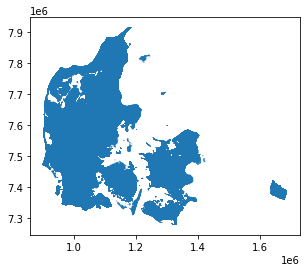

In [ ]:
# Make sure that the plot function works with the new merged data
stoej_in_mun.plot()

In [ ]:
# Create a new column with average noise in municipalities 
stoej_in_mun['mgdstoej'] = stoej_in_mun['GNSHAST071'].groupby(stoej_in_mun['KOMKODE']).transform('mean')

In [ ]:
# Inspect the changed DataFrame
stoej_in_mun.head()

index_left DATAEJER  VEJBESTYRE  ...  TIMEOF_REV  TIMEOF_EXP   mgdstoej
KOMNAVN                                    ...                                   
Aabenraa      7277.0        0         0.0  ...        None  2020-11-07  80.434694
Aabenraa      7580.0        0       580.0  ...        None  2020-11-07  80.434694
Aabenraa       939.0      580       580.0  ...        None  2020-11-07  80.434694
Aabenraa      7276.0        0         0.0  ...        None  2020-11-07  80.434694
Aabenraa      3195.0      580       580.0  ...        None  2020-11-07  80.434694

[5 rows x 61 columns]

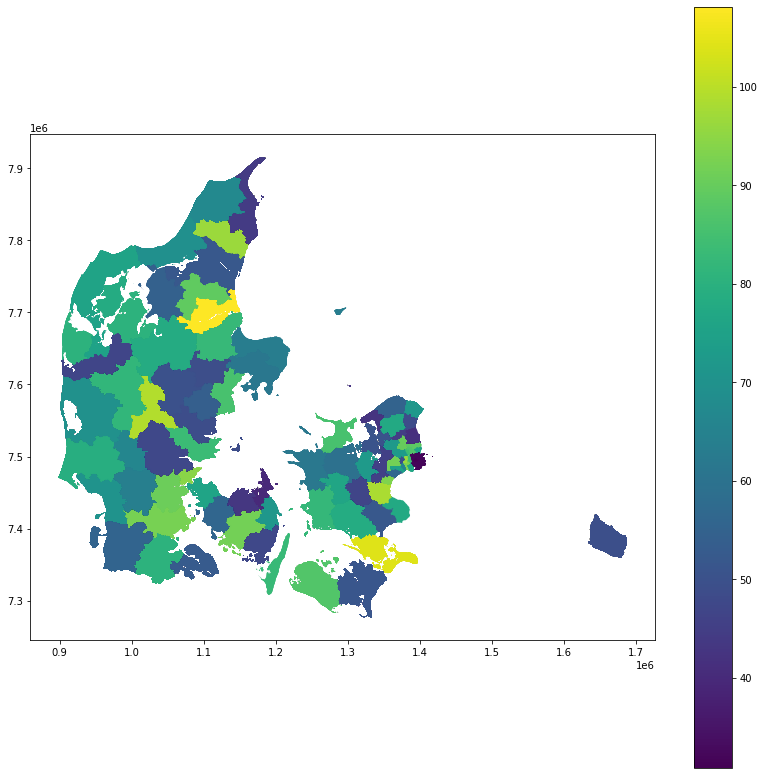

In [ ]:
# Display average municipality noise in a figure
stoej_in_mun.plot(column="mgdstoej", legend="True", figsize=(14,14))

In [ ]:
# Reload municipality dataset to create map of mental health by municipality

municipalities = gdp.read_file("KOMMUNE.shp")
municipalities.head()

FEAT_ID  ...                                           geometry
0   149673  ...  POLYGON Z ((675926.480 6172129.210 -999.000, 6...
1   149674  ...  POLYGON Z ((687523.890 6176458.950 -999.000, 6...
2   149675  ...  POLYGON Z ((689361.510 6173523.720 -999.000, 6...
3   149676  ...  POLYGON Z ((689210.210 6174589.210 -999.000, 6...
4   149647  ...  POLYGON Z ((679613.660 6187623.990 -999.000, 6...

[5 rows x 25 columns]

In [ ]:
# Inspect reloaded dataset
municipalities.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1575 entries, 0 to 1574
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   FEAT_ID     1575 non-null   int64   
 1   FEAT_KODE   1575 non-null   int64   
 2   FEAT_TYPE   1575 non-null   object  
 3   FEAT_STTXT  1575 non-null   object  
 4   GEOM_STTXT  1575 non-null   object  
 5   DAGI_ID     1575 non-null   int64   
 6   AREAL       1575 non-null   float64 
 7   REGIONKODE  1575 non-null   object  
 8   REGIONNAVN  1575 non-null   object  
 9   GYLDIG_FRA  1575 non-null   object  
 10  GYLDIG_TIL  0 non-null      object  
 11  KOMKODE     1575 non-null   object  
 12  KOMNAVN     1575 non-null   object  
 13  DQ_SPECIFK  1575 non-null   object  
 14  DQ_STATEM   1575 non-null   object  
 15  DQ_DESCR    1575 non-null   object  
 16  DQ_PROCESS  1575 non-null   object  
 17  DQ_RESPONS  1575 non-null   object  
 18  DQ_POSACPL  1575 non-null   object  
 19

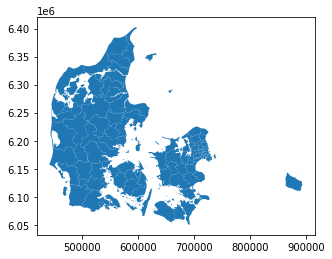

In [ ]:
# Make sure that the plot function works with the data
municipalities.plot()

In [ ]:
# Use dissolve so that municipalities appear no more than once in the dataset 'mun'
un = municipalities.dissolve(by='KOMNAVN')

In [ ]:
# Make sure that the dissolve was successful 
mun.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 99 entries, Aabenraa to Ærø
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   geometry    99 non-null     geometry
 1   FEAT_ID     99 non-null     int64   
 2   FEAT_KODE   99 non-null     int64   
 3   FEAT_TYPE   99 non-null     object  
 4   FEAT_STTXT  99 non-null     object  
 5   GEOM_STTXT  99 non-null     object  
 6   DAGI_ID     99 non-null     int64   
 7   AREAL       99 non-null     float64 
 8   REGIONKODE  99 non-null     object  
 9   REGIONNAVN  99 non-null     object  
 10  GYLDIG_FRA  99 non-null     object  
 11  GYLDIG_TIL  0 non-null      object  
 12  KOMKODE     99 non-null     object  
 13  DQ_SPECIFK  99 non-null     object  
 14  DQ_STATEM   99 non-null     object  
 15  DQ_DESCR    99 non-null     object  
 16  DQ_PROCESS  99 non-null     object  
 17  DQ_RESPONS  99 non-null     object  
 18  DQ_POSACPL  99 non-null     object  
 19 

In [ ]:
# Load mental health data
mun_data=pd.read_excel("https://github.com/CALDISS-AAU/sdsphd20/raw/master/datasets/spatialdata.xlsx")
mun_data.head()

omr  alt2016  psyk2016  psykratio
0      København    64735      1326   0.020484
1  Frederiksberg    12364       258   0.020867
2         Dragør     1746        54   0.030928
3         Tårnby     5614       158   0.028144
4    Albertslund     3686        76   0.020619

In [ ]:
# Merge datasets: Mun and mun_data
mun_fun = mun.merge(mun_data, left_on='KOMNAVN', right_on="omr", how='left', validate="one_to_one")
mun_fun.head()

geometry  ...  psykratio
0  MULTIPOLYGON Z (((532611.300 6079233.260 -999....  ...   0.015536
1  MULTIPOLYGON Z (((577131.740 6306752.540 -999....  ...   0.018536
2  MULTIPOLYGON Z (((580132.510 6230146.780 -999....  ...   0.016495
3  POLYGON Z ((711377.280 6178342.550 -999.000, 7...  ...   0.020619
4  POLYGON Z ((701094.650 6192181.200 -999.000, 7...  ...   0.009304

[5 rows x 28 columns]

In [ ]:
# Inspect merged dataset
mun_fun.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 99 entries, 0 to 98
Data columns (total 28 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   geometry    99 non-null     geometry
 1   FEAT_ID     99 non-null     int64   
 2   FEAT_KODE   99 non-null     int64   
 3   FEAT_TYPE   99 non-null     object  
 4   FEAT_STTXT  99 non-null     object  
 5   GEOM_STTXT  99 non-null     object  
 6   DAGI_ID     99 non-null     int64   
 7   AREAL       99 non-null     float64 
 8   REGIONKODE  99 non-null     object  
 9   REGIONNAVN  99 non-null     object  
 10  GYLDIG_FRA  99 non-null     object  
 11  GYLDIG_TIL  0 non-null      object  
 12  KOMKODE     99 non-null     object  
 13  DQ_SPECIFK  99 non-null     object  
 14  DQ_STATEM   99 non-null     object  
 15  DQ_DESCR    99 non-null     object  
 16  DQ_PROCESS  99 non-null     object  
 17  DQ_RESPONS  99 non-null     object  
 18  DQ_POSACPL  99 non-null     object  
 19  DQ

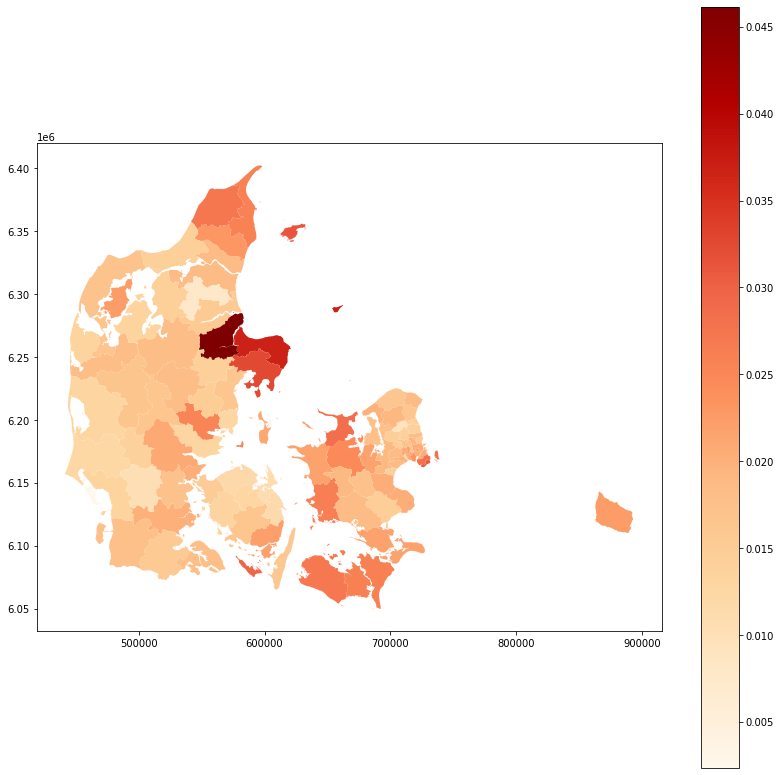

In [ ]:
# Draw map of mental health by municipality and compare with previous plot of noise by municipality. We see that noise is associated with poor mental health
mun_fun.plot(column="psykratio", legend="True", figsize=(14,14), cmap='OrRd')



---
# **Thursday, 26th of November: NLP I & II**


---






---


##*Task: Trump vs. GPT-2*


---



The site [https://faketrump.ai/](https://faketrump.ai/) WAS an interesting example of AI-powered fake-text generation. They wrote in 2019:

>We built an artificial intelligence model by fine-tuning [GPT-2](https://openai.com/blog/better-language-models/) to generate tweets in the style of Donald Trump’s Twitter account. After seeing the results, we also built a discriminator that can accurately detect fake tweets 77% of the time — think you can beat our classifier? Try it yourself!

Unfortunately, they decided to take down the site and the dataset.

GPT-2 is a neural transformer-based model, that has been announced by OpenAI in February 2019 and created considerable discussion because they decided - in contrast to their earlier policies - not to release the mode to the public. Their central argument was that the model could be used to produce fake news, spam and alike too easily. The footnote of the faketrump page reads: “Generating realistic fake text has become much more accessible. We hope to highlight the current state of text generation to demonstrate how difficult it is to discern fiction from reality.”


Since then several organizations and researchers have shown that it is [possible to develop systems to detect “fake text”](https://www.theguardian.com/technology/2019/jul/04/ai-fake-text-gpt-2-concerns-false-information). We believe that you too can implement a competitive system.

Having no dataset from that project, Roman decided to retrain GPT2 to generate new fake trump tweets. If they can do that, we can do that! However, it seems as if it is easier for ML models to identify our fake tweets...well...they are an AI company and probably spent more time on that...

> I’ve just watched Democrats scream over and over again about trying to Impeach the President of the United States. The Impeachment process is a sham.

> The Media must understand!“The New York Times is the leader on a very important subject: How to Combat Trump.” @foxandfriendsSo pathetic! @foxandfriendsI don’t think so.

> He is going to do it soon, and with proper borders. Border security is my top priority.The Democrats have failed the people of Arizona in everything else they have done, even their very good immigration laws. They have no sense.

The data can be found [here](https://github.com/SDS-AAU/SDS-master/raw/e2c959494d53859c1844604bed09a28a21566d0f/M3/assignments/trump_vs_GPT2.gz) and has the following format:


<table>
  <tr>
   <td>0
   </td>
   <td>1
   </td>
  </tr>
  <tr>
   <td>string
   </td>
   <td>boolean
   </td>
  </tr>
</table>

There are 7368 real Trump tweet and 7368 fake ones.

you can open it with:



```
data = pd.read_json('https://github.com/SDS-AAU/SDS-master/raw/e2c959494d53859c1844604bed09a28a21566d0f/M3/assignments/trump_vs_GPT2.gz')
```



* Split the data and preprocess it, vectorizing the text using different approaches (BoW, TFIDF, LSI)

* Create a system that can identify the fake Trump tweets using LogisticRefression or other classifiers (Sklearn - If you like also more complex models with FastAI, Keras neural nets or alike)

* Explore a subset (~1000) of the real and fake tweets using LDA and visualize your exploration

* Consider exploring using a different approach (LSI + clustering) or perhaps even [CorEx](https://github.com/gregversteeg/corex_topic)

In [ ]:
# Install Eli5
!pip -q install eli5 

In [ ]:
# Import packages: pandas and numpy
import pandas as pd
import numpy as np

%matplotlib inline 

In [ ]:
# Import dataset
data = pd.read_json('https://github.com/SDS-AAU/SDS-master/raw/e2c959494d53859c1844604bed09a28a21566d0f/M3/assignments/trump_vs_GPT2.gz')

In [ ]:
# Get initial overview of data
data.head()


0     1
0  I was thrilled to be back in the Great city of...  True
1  The Unsolicited Mail In Ballot Scam is a major...  True
2  As long as I am President, I will always stand...  True
3  Our Economy is doing great, and is ready to se...  True
4  If I do not sound like a typical Washington po...  True

In [ ]:
# Get initial overview of data - part 2
data.shape

(14736, 2)

In [ ]:
# Import module to split data into training / test
from sklearn.model_selection import train_test_split

In [ ]:
# Define in- and outputs

X = data[0].values
y = data[1].values

In [ ]:
# Inspext X
X

array(['I was thrilled to be back in the Great city of Charlotte, North Carolina with thousands of hardworking American Patriots who love our Country, cherish our values, respect our laws, and always put AMERICA FIRST!',
       'The Unsolicited Mail In Ballot Scam is a major threat to our Democracy, &amp; the Democrats know it.',
       'As long as I am President, I will always stand with the HEROES of Law Enforcement!',
       ...,
       'The Washington Post, after having been so dishonest in the past, is finally reporting the real story!Just landed in Arizona where we will win the Great State of Arizona in November. It is called the Great State of Arizona. #Trump2016 day in Colorado! Congratulations to Dan Conway.',
       'No one else did so well in many decades of being treated fairly. Thank you! #INPrimary @DevinNunes (@DevinNunesForCongress) is a great man who has been through a number of tough times and was able to put up a solid fight.',
       '#KAG2020 are sending a delegati

In [ ]:
# Inspect y
y

array([ True,  True,  True, ..., False, False, False])

In [ ]:
# Split the data in 80% training and 20% test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=18)

In [ ]:
# Create simple Back of Words (BoW) vectorizer 
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X_train_vec_1 = vectorizer.fit_transform(X_train) 

In [ ]:
# Instantiate a logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=2000)

In [ ]:
# Train the model

model.fit(X_train_vec_1, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=2000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Transform the test-set
X_test_vec_1 = vectorizer.transform(X_test) #Vectoren bruges til at transformere

In [ ]:
# Check performance of the model
model.score(X_test_vec_1, y_test)

0.8059701492537313

In [ ]:
# Predict on new data

y_pred = model.predict(X_test_vec_1)

In [ ]:
# Create confusion matrix by hand: Displays which tweets were predicted correctly

pd.crosstab(y_test, y_pred)

col_0  False  True 
row_0              
False   1180    309
True     263   1196

In [ ]:
# Use alternative vectorizing method: TFIDF 
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train_vec_2 = vectorizer.fit_transform(X_train)

model = LogisticRegression(max_iter=2000)

# Train the model

model.fit(X_train_vec_2, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=2000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Transform the test-set
X_test_vec_2 = vectorizer.transform(X_test)

In [ ]:
# Check performance of the model: Close to the performance with the BoW vectorizer
model.score(X_test_vec_2, y_test)

0.8171641791044776

In [ ]:
# Visualization of words used to predict whether tweets were true or false
import eli5
eli5.show_weights(model, feature_names=vectorizer.get_feature_names(), target_names=['False','True'], top=50)

### Explore subset of real and fake tweets

In [ ]:
# Import spacy

import spacy

# Load the small english language model. Large models can be downloaded for many languages.
nlp = spacy.load("en")

In [ ]:
# Explore text
doc = nlp(X_test[1])
X_test[1]

'Texas LC George P. Bush backed me when it wasn’t the politically correct thing to do, and I back him now.'

In [ ]:
# Let's look at the POS tags
[(tok.text, tok.pos_) for tok in doc]

[('Texas', 'PROPN'),
 ('LC', 'PROPN'),
 ('George', 'PROPN'),
 ('P.', 'PROPN'),
 ('Bush', 'PROPN'),
 ('backed', 'VERB'),
 ('me', 'PRON'),
 ('when', 'ADV'),
 ('it', 'PRON'),
 ('was', 'AUX'),
 ('n’t', 'PART'),
 ('the', 'DET'),
 ('politically', 'ADV'),
 ('correct', 'ADJ'),
 ('thing', 'NOUN'),
 ('to', 'PART'),
 ('do', 'AUX'),
 (',', 'PUNCT'),
 ('and', 'CCONJ'),
 ('I', 'PRON'),
 ('back', 'VERB'),
 ('him', 'PRON'),
 ('now', 'ADV'),
 ('.', 'PUNCT')]

In [ ]:
# Let's tokenize the first 1000 tweets 
tokenlist = []
for doc in nlp.pipe(X_train[:1000]):
  tokens =[tok.text.lower() for tok in doc if tok.pos_ in ['NOUN','ADJ','ADV','VERB'] and not tok.is_stop]
  tokenlist.append(tokens)

In [ ]:
# Inspect tokenlist
tokenlist

[['#'],
 ['wanted', 'avoid', 'supporting', 'talking'],
 ['look',
  'forward',
  'making',
  'history',
  'ongoing',
  'attempt',
  'inflation',
  'continues',
  'push',
  'countries',
  'deeper',
  'recession',
  'sign',
  'weakness',
  'inflation!',
  'agreement'],
 ['clearly', 'obstruction'],
 ['passed', 'biggest', 'history'],
 ['losing',
  'billions',
  'dollars',
  'year',
  'charging',
  'little',
  'deliver',
  'packages',
  'making',
  'richer',
  'dumber',
  'poorer'],
 ['speaking', 'today', 'republican', 'jewish', 'meeting'],
 ['proud', 'know', 'love', 'think', 'better', 'situation'],
 ['activity', 'far', 'greater', 'threat'],
 ['like', 'deal'],
 ['@fitn', '#', 'journal'],
 ['trying',
  'sound',
  'bad',
  'pretending',
  'approval',
  'ratings',
  'best',
  'clue',
  'trying',
  'change'],
 ['amp',
  'presentation',
  'loaded',
  'lies',
  'misrepresentations',
  'refusing',
  'state',
  'withheld',
  'aid',
  'countries',
  'including'],
 ['facts',
  'total',
  'fraud',
  'a

In [ ]:
# Import dictionary function from Gensim

from gensim.corpora.dictionary import Dictionary

In [ ]:
# Create a dictionary using the newly imported function
dictionary = Dictionary(tokenlist)

In [ ]:
# Inspect the dictionary created
len(dictionary)

2457

In [ ]:
dictionary.filter_extremes(no_below=5, no_above=0.2) # I choose not to do this because the dictionary had a relatively short length to begin with

In [ ]:
# Vectorize text, taking only dictionary values into account 

vectorizer = TfidfVectorizer(vocabulary=list(dictionary.values()))
X_train_vec_2 = vectorizer.fit_transform(X_train)

model = LogisticRegression(max_iter=1000)

# Train the model

model.fit(X_train_vec_2, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Transform the test-set
X_test_vec_2 = vectorizer.fit_transform(X_test)

In [ ]:
# Check performance of the model
model.score(X_test_vec_2, y_test)

0.7381275440976933

In [ ]:
# # Visualization of words used to predict whether tweets were true or false
eli5.show_weights(model, feature_names=vectorizer.get_feature_names(), target_names=['negative','positive'], top=50)


In [ ]:
# Another way of visualizing it
eli5.show_prediction(model, X_test[0], vec=vectorizer, target_names=['negative','positive'])